# Practice functions

Review [`Intro_to_functions`](Intro_to_functions.ipynb) before coming in here.

Our goal for this notebook is to get some practice writing functions. You can place these functions in `utils.py` once you've confirmed that you've got them working properly in the notebook.

### Exercise

We would like to write a function that takes malformed depth strings from LAS files and returns something we can cast to a float. For example, if we get strings `'2370 M'` or `'12,300ft'` as input then we would like our function to return `'2370'` or `'12300'`.

Rearrange the following lines to perform this task:

In [ ]:
# Replace any numeral separating commas.
return value
stripped = quantity.lower().strip(' \n\t.mft')
def clean_quantity(quantity):
# Remove units and other stuff.
"""Clean the units from a number."""
value = stripped.replace(',', '')

In [ ]:
#YOUR CODE HERE



In [1]:
def clean_quantity(quantity):
    """Clean the units from a number."""
    # Remove units and other stuff.
    stripped = quantity.lower().strip(' \n\t.mft')
    # Replace any numeral separating commas.
    value = stripped.replace(',', '')
    return value

Here's a cell you can run to check that your function returns what you need.

In [4]:
tests = {'2370 M': '2370', '12,300ft': '12300'}

for test, answer in tests.items():
    assert clean_quantity(test) == answer
    
# If everything is good, then nothing happens when you run this cell!

### Exercise

Notice the type returned by this function. Can you change it slightly to return a more appropriate type?

Your new function should return `2370.0` or `12300.0` for the examples you used previously.

### Exercise

Use the code from the `if` section of `Intro_to_Python` to also return the units as a string. If there's nothing we recognize, we'll return `None` for the units.

After both of these modifications your function should work like this: if we get `'2370 M'` or `'12,300ft'` as input then we would like our function to return `(2370.0, 'm')` or `(12300.0, 'ft')`. Finally, an input of `'3322'` should return `(3322.0, None)`.

In [ ]:
# YOUR CODE HERE



In [1]:
def clean_quantity(quantity):
    """Clean the units from a number."""
    if 'm' in quantity.lower():
        units = 'm'
    elif 'f' in quantity.lower():
        units = 'ft'
    else:
        units = None
    
    stripped = quantity.lower().strip(' .mft\n\t')  # They need tab and newline for a future exercise.
    value = stripped.replace(',', '')

    return float(value), units

In [ ]:
tests = {'2370 M': (2370.0, 'm'), '12,300ft': (12300.0, 'ft'), '3322': (3322.0, None)}

for test, answer in tests.items():
    assert clean_quantity(test) == answer

### Stretch goal

Can you modify the function so that a user can optionally pass in a dictionary of term:unit pairs with which to augment the current search?

For example, I might pass in a dictionary like `{'mile': 'mi', 'mm': 'millimetres'}`.

In [104]:
# YOUR CODE HERE



In [1]:
import string

def clean_quantity(quantity, terms=None):  # Cannot use mutables as default values.
    """
    Clean the units from a number.
    
    Accepts a dictionary of possible unit types.
    """
    terms_ = {'m': 'm', 'f': 'ft'}
    if terms is None:
        terms = {}
    terms_.update(terms)
    
    units = None
    for term, unit in terms_.items():
        if term.lower() in quantity.lower():
            units = unit.lower()
    
    stop = string.ascii_lowercase + ' .\n\t'
    stripped = quantity.lower().strip(stop)
    value = stripped.replace(',', '')

    return float(value), units

Once you have something, test it on this:

In [3]:
depth = '2345 mm'

clean_quantity(depth, {'mile': 'miles', 'mm': 'millimetres'})

(2345.0, 'millimetres')

When you get it working, add this function to the `utils.py` module.

<h3>Advanced topic: Named tuples</h3>

<p>The `clean_quantity()` function is a pretty good use case for 'named tuples', which are like lightweight classes. To return a named tuple, replace the last line of the function with:</p>

<pre>
Quantity = namedtuple('Quantity', ['value', 'units'])
return Quantity(value=float(value), units=units)
</pre>

<p>Now we can get unpack the results just as before, without knowing anything about named tuples:</p>

<pre>
value, units = clean_quantity('2375 m')
</pre>

<p>Or we can get the tuple itself, and see that the fields are labelled for us. Nice!</p>

<p>We can also get at its fields via dot notation, like attributes on a class: `quantity.value` and `quantity.units`.</p>

<p>Finally, you can get a dictionary representation with `quantity._asdict()`.</p>

## Optional arguments and default values

As we saw earlier, we can set default values for some or all of the things we pass to the function — its 'arguments'.

### Exercise

Let's implement the equation for VSH:

$$ \mathrm{VSH}_\mathrm{Linear} = \frac{\mathrm{GR}_\mathrm{log} - \mathrm{GR}_\mathrm{clean}}{\mathrm{GR}_\mathrm{shale} - \mathrm{GR}_\mathrm{clean}} $$

Things to consider:

- How many 'input' variables are there in this equation? Make sure your function has the same number.
- Use default values of 25 API and 125 API for the clean response and the shale response respectively.
- The equation is linear, but VSH has a min of 0 and a max of 1. Implement this using [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).
- Don't forget to write a docstring!

In [ ]:
# YOUR CODE HERE



In [9]:
def vsh_linear(gr, clean=25, shale=125):
    """
    Computes VSH given GR. Optionally give GR_sand and GR_shale bounds.
    """
    vsh = (gr - clean) / (shale - clean)
    return np.clip(vsh, 0, 1)

### Exercise

There are [various other models of VSH](https://geoloil.com/VshModels.php), for example Clavier and Stieber.

The Stieber model looks like this:

$$ \mathrm{VSH}_\mathrm{Stieber} = \frac{\mathrm{VSH}}{3 - 2\times\mathrm{VSH}} $$

We'd implement it like so:

```python
def vsh_stieber(vsh):
    """Compute VSH using the Stieber model."""
    return vsh / (3 - 2*vsh)
```

The Clavier model looks like this:

$$ \mathrm{VSH}_\mathrm{Clavier} = 1.7 - \sqrt{3.38 - (\mathrm{VSH} + 0.7)^2} $$

Implement this model in code:

In [93]:
def vsh_stieber(vsh):
    """Compute VSH using the Stieber model."""
    return vsh / (3 - 2*vsh)

In [ ]:
# YOUR CODE HERE



In [7]:
def vsh_clavier(vsh):
    """Compute VSH using the Clavier model."""
    return 1.7 - np.sqrt(3.38 - (vsh + 0.7)**2)

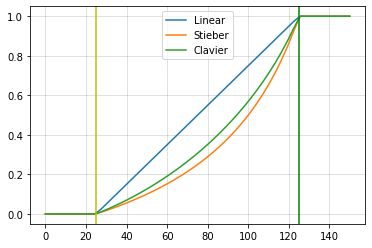

In [95]:
import numpy as np
import matplotlib.pyplot as plt

GR = np.linspace(0, 150)

clean, shale = 25, 125

VSH = vsh_linear(GR, clean=clean, shale=shale)
stieber = vsh_stieber(VSH)
clavier = vsh_clavier(VSH)

fig, ax = plt.subplots()
ax.plot(GR, VSH, label="Linear")
ax.plot(GR, stieber, label="Stieber")
ax.plot(GR, clavier, label="Clavier")
ax.axvline(clean, c='y')
ax.axvline(shale, c='g')
ax.grid(color='k', alpha=0.15)
ax.legend()

### Exercise

There's also the Larionov model of VSH for pre-Cretaceous rocks:

$$ \mathrm{VSH}_\mathrm{Larionov, old} = 0.33 \ (2^{2 \times \mathrm{VSH}} - 1) $$

and the Larionov model of VSH for post-Cretaceous rocks:

$$ \mathrm{VSH}_\mathrm{Larionov, young} = 0.083 \ (2^{3.7 \times \mathrm{VSH}} - 1) $$

Implement one or both of these functions.

In [ ]:
# YOUR CODE HERE



In [78]:
def vsh_larionov_old(vsh):
    """Larionov's relationship for old rocks."""
    return 0.33 * (2**(2 * vsh) - 1)

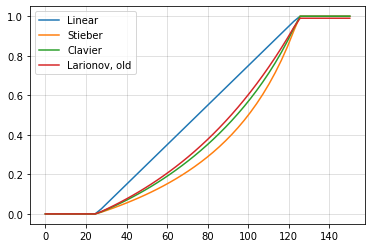

In [83]:
import matplotlib.pyplot as plt

larionov_old = vsh_larionov_old(VSH, )

fig, ax = plt.subplots()
ax.plot(GR, VSH, label="Linear")
ax.plot(GR, stieber, label="Stieber")
ax.plot(GR, clavier, label="Clavier")
ax.plot(GR, larionov_old, label="Larionov, old")
ax.grid(color='k', alpha=0.15)
# ax.set_ylim(0.95, 1.05)
ax.legend()

### 🤔 Check the numerical accuracy for the most shaley rocks

Does that look okay? If it does, try `ax.set_ylim=(0.95, 1.05)`.

What's going on?

This is partly a design conversation, partly a reproducibility conversation, and partly a geological conversation.

The main problem is that when VSH = 1, our new quantity does not quite give us 1 back.

Notice that the 2 functions are almost the same. Furthermore, notice that the factor $0.33$ is the same as $2^2 - 1$, and $0.083 \approx 2^{3.7} - 1$. Since they are related, we can eliminate the numerical inaccuracy by computing these numbers.

It turns out we can write a single equation with one variable:

$$ \mathrm{VSH}_\mathrm{Larionov} = \frac{1}{L} \ (2^{\log_2(L) \times \mathrm{VSH}} - 1) $$


In [91]:
def vsh_larionov(vsh, age=None, L=8):
    """
    Compute VSH using Larionov's relationships.
    
    - If `age` is given, it is interpreted as an age in Ma.
    - If `age` is `None` (default value), then `x` is used.
    """
    if age is not None:
        if age < 65:
            L = 13
        else:
            L = 4
    
    a, b = 1/(L - 1), np.log2(L)
            
    return a * (2**(b * vsh) - 1)

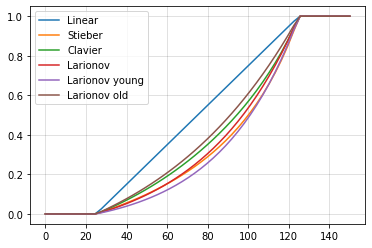

In [92]:
import matplotlib.pyplot as plt

larionov_default = vsh_larionov(VSH)
larionov_young = vsh_larionov(VSH, age=10)
larionov_old = vsh_larionov(VSH, age=100)

fig, ax = plt.subplots()
ax.plot(GR, VSH, label="Linear")
ax.plot(GR, stieber, label="Stieber")
ax.plot(GR, clavier, label="Clavier")
ax.plot(GR, larionov_default, label="Larionov")
ax.plot(GR, larionov_young, label="Larionov young")
ax.plot(GR, larionov_old, label="Larionov old")
ax.grid(color='k', alpha=0.15)
ax.legend()

In [75]:
from ipywidgets import interact

@interact(L=(2, 31))
def show(L):

    larionov = vsh_larionov(VSH, L=L)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(GR, VSH, label="Linear")
    ax.plot(GR, stieber, label="Stieber")
    ax.plot(GR, clavier, label="Clavier")
    ax.plot(GR, larionov, label=f"Larionov, L={L}")
    ax.grid(color='k', alpha=0.15)
    ax.legend()

interactive(children=(IntSlider(value=16, description='L', max=31, min=2), Output()), _dom_classes=('widget-in…

----

&copy; 2020 Agile Scientific